# 🎧 Scenario B Scaffold

### TODO: Train a Random Forest classifier

## 📥 Load and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

sns.set(style="whitegrid")

## Read Data File


In [2]:
data = pd.read_csv('scenario_A_data.csv')
data = pd.get_dummies(data).astype(int)
#data = pd.get_dummies(data)
data.info()

X = data.drop(columns=['default'])
y = data['default']

X.info()
y
X.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   age                              1000 non-null   int64
 1   income                           1000 non-null   int64
 2   loan_amount                      1000 non-null   int64
 3   loan_term                        1000 non-null   int64
 4   credit_score                     1000 non-null   int64
 5   default                          1000 non-null   int64
 6   employment_status_Employed       1000 non-null   int64
 7   employment_status_Self-employed  1000 non-null   int64
 8   employment_status_Unemployed     1000 non-null   int64
 9   housing_status_Mortgage          1000 non-null   int64
 10  housing_status_Own               1000 non-null   int64
 11  housing_status_Rent              1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB
<class 'pandas

,age,income,loan_amount,loan_term,credit_score,employment_status_Employed,employment_status_Self-employed,employment_status_Unemployed,housing_status_Mortgage,housing_status_Own,housing_status_Rent
0,45,90150,12645,48,707,0,1,0,0,1,0
1,33,57277,19626,12,681,0,1,0,0,0,1
2,36,73818,17877,36,750,1,0,0,0,1,0
3,41,46339,15098,24,642,1,0,0,0,1,0
4,37,51405,17538,36,657,0,0,1,0,0,1
5,52,65212,19167,36,693,1,0,0,0,1,0
6,60,80637,23518,36,776,0,1,0,1,0,0
7,48,62284,17201,24,728,0,0,1,0,0,1
8,39,42411,21491,36,661,1,0,0,1,0,0
9,35,54688,19968,60,720,1,0,0,0,0,1


## Check Class Distribution

In [3]:
data['default'].value_counts()

default
0    980
1     20
Name: count, dtype: int64

## Preprocess Categorical Variables

## Split Data into Training and Testing Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Train Random Forest Classifier

In [5]:
# RandomForestClassifier using predict with 0.5 threshold
print(f"RandomForestClassifier")
print("-" * 55)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Predict")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-" * 55)

# RandomForestClassifier using predict_proba and test threshold 0.3 0.5 0.7
y_proba = model.predict_proba(X_test)[:,1]

print("Predict_proba:")
print("-" * 55)

for threshold in [0.3, 0.5, 0.7]:
    y_pred_new = (y_proba >= threshold).astype(int)
    print(f"Predict_Proba and Threshold = {threshold}")
    print(confusion_matrix(y_test, y_pred_new))
    print(classification_report(y_test, y_pred_new))
    print("-" * 55)


# LogisticRegression using predict with threshold 0.5
print(f"LogisticRegression")
print("-" * 55)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Predict")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# LogisticRegression using predict_proba and test threshold 0.3 0.5 0.7
y_proba = model.predict_proba(X_test)[:,1]

print("Predict_proba:")
print(y_proba[0])
print("-" * 55)

for threshold in [0.3, 0.5, 0.7]:
    y_pred_new = (y_proba >= threshold).astype(int)
    print(f"Predict_Proba and Threshold = {threshold}")
    print(confusion_matrix(y_test, y_pred_new))
    print(classification_report(y_test, y_pred_new))
    print("-" * 55)

RandomForestClassifier
-------------------------------------------------------
Predict
[[246   0]
 [  1   3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      0.75      0.86         4

    accuracy                           1.00       250
   macro avg       1.00      0.88      0.93       250
weighted avg       1.00      1.00      1.00       250

-------------------------------------------------------
Predict_proba:
-------------------------------------------------------
Predict_Proba and Threshold = 0.3
[[245   1]
 [  1   3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       0.75      0.75      0.75         4

    accuracy                           0.99       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.99      0.99      0.99       250

----------------------------------------------------

## Model Evaluation

ROC AUC: 0.9969512195121951


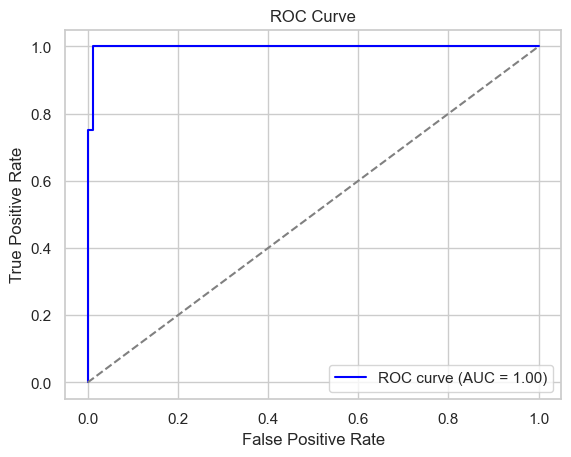

In [6]:
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Feature Importance